# Weekly Assignment 1, 2 , 3

In [60]:
import seaborn as sns # This is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt # We need Matplotlib for setting the labels in the Seaborn graphs
import numpy as np
import math # For the math part on the end

from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df1 = pd.read_csv('steps.csv', sep=";")
df2 = pd.read_csv('survey.csv', sep=",")
df1.head(10)

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11436.0,7899.0,11731.0,14151.0,NaN,3996.0,2556.0,302.0,2442.0,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df2.head(10)

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
5,6,Lille,Male,35-44,1,1,Vocational,170.0,63.0
6,7,Montpellier,Male,25-34,2,2,Master or doctorate,175.0,75.0
7,8,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0
8,9,Lille,Female,35-44,4,4,Vocational,172.0,69.0
9,10,Lille,Female,25-34,2,2,Master or doctorate,165.0,93.0


#### Now we are going to merge both CSV files and create the variable mean steps per participant

In [62]:
df = df2.merge(df1, on="id") # Merge both CSV files into 1 file based on id:
# Create the variable mean steps per participant:
df["mean"] = df.iloc[:, 10:].mean(axis=1)
# axis=1 means along "columns". It's a column-wise operation. Default is 0 which is along rows of a column.
df.head(10)

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630
5,6,Lille,Male,35-44,1,1,Vocational,170.0,63.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11908.509804
6,7,Montpellier,Male,25-34,2,2,Master or doctorate,175.0,75.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4715.400000
7,8,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3594.051724
8,9,Lille,Female,35-44,4,4,Vocational,172.0,69.0,NaN,...,7899.0,11731.0,14151.0,NaN,3996.0,2556.0,302.0,2442.0,NaN,8626.707965
9,10,Lille,Female,25-34,2,2,Master or doctorate,165.0,93.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3787.043478


In [63]:
# Filter the mean to a max of 17.000 so that it doesn't show to much uninrellevant data or "Outliers"
def above_17000(x):
    if x > 17000.0:
        return float("NaN")
    else:
        return x
df["mean"] = df["mean"].apply(above_17000)

C:\Users\Mango\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean'>

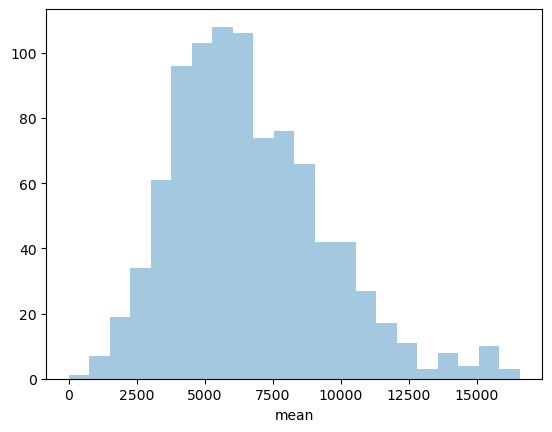

In [64]:
sns.distplot(df["mean"].dropna(), kde=False) # Drop empty rows
# As you can see that mostly is around 3000-10.000.

# Let's take a closer look with a median, mean, std and skew.

The median is: 6236 steps
The mean is: 6658 steps
The Standard Deviation is: 2836 steps


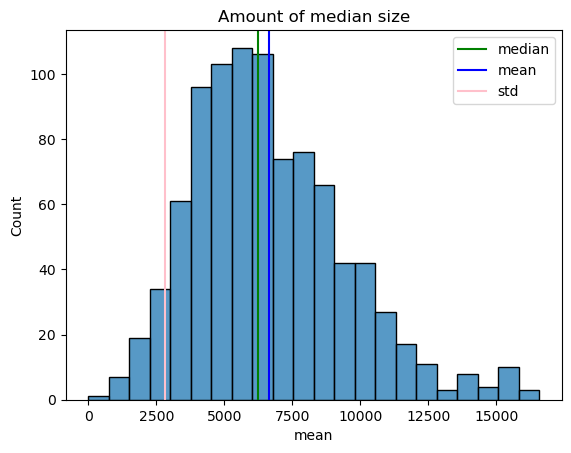

In [65]:
# Histogram Plot
mean_size = df['mean'].mean()
median_size = df['mean'].median()
std = np.std(df['mean']) # The standard deviation gives an idea of how close the entire set of data is to the average value.
print(f'The median is: {round(median_size,)} steps') # Round to 0 decimal
print(f'The mean is: {round(mean_size,)} steps')
print(f'The Standard Deviation is: {round(std,)} steps') 
sns.histplot(df['mean'], kde=False)
plt.title('Amount of median size')
plt.axvline(median_size, 0, 100, color='green', label='median') # This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.axvline(std, 0, 100, color='pink', label='std')
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

The median is: 6236 steps
The mean is: 6658 steps
The Standard Deviation is: 2836 steps


C:\Users\Mango\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mango\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


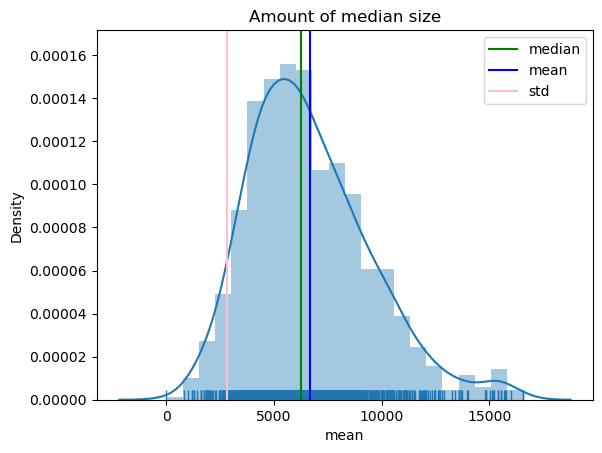

In [66]:
# Density Plot
mean_size = df['mean'].mean()
median_size = df['mean'].median()
std = np.std(df['mean']) # The standard deviation gives an idea of how close the entire set of data is to the average value.
print(f'The median is: {round(median_size,)} steps') # Round to 0 decimal
print(f'The mean is: {round(mean_size,)} steps')
print(f'The Standard Deviation is: {round(std,)} steps') 
sns.distplot(df['mean'], rug=True) # Create Displot
plt.title('Amount of median size')
plt.axvline(median_size, 0, 100, color='green', label='median') # This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.axvline(std, 0, 100, color='pink', label='std')
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

There are a few things to note here:
* We see that the Density Plot is right skewed.
* The Median is: 6236 steps
* The Mean is: 6658 steps
* The Standard Deviation is:2836 steps

<AxesSubplot:xlabel='gender', ylabel='mean'>

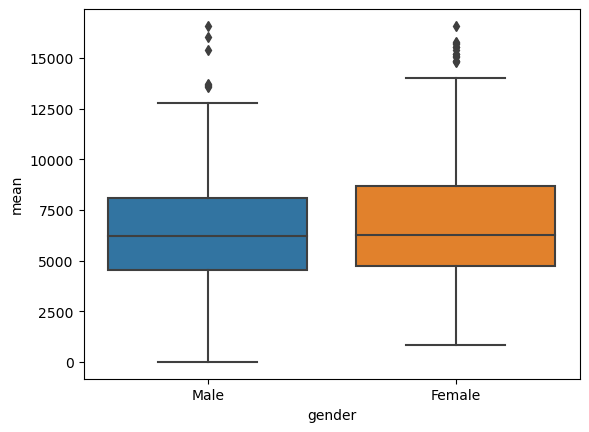

In [67]:
sns.boxplot(x="gender", y="mean", data=df)

There are a few things to note here:
* We see a higher amount of femlaes in the group. And the mean of steps are higher by Famles then Males.
* Furhtermore, The total amount of steps are higher in total at Females.

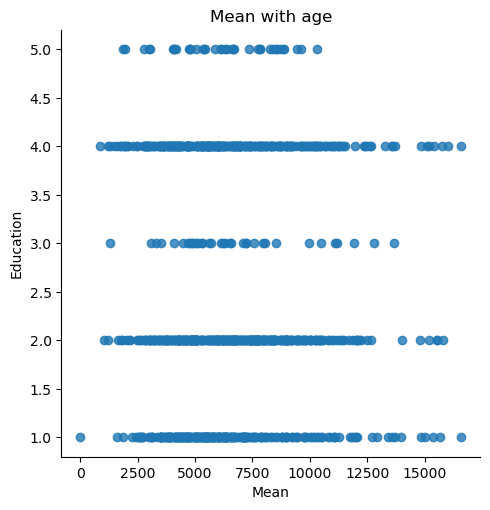

In [68]:
sns.lmplot(x='mean', y='education', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Mean') #use matplotlib to refine Seaborn plot
plt.ylabel('Education')
plt.title('Mean with age')
plt.show()

There are a few things to note here:
* We see that Edicuationlevel 3.0 and 5.0 are having a lower amount of mean steps comapred to the education lvl of 1,2 and 4.

<AxesSubplot:xlabel='mean', ylabel='age'>

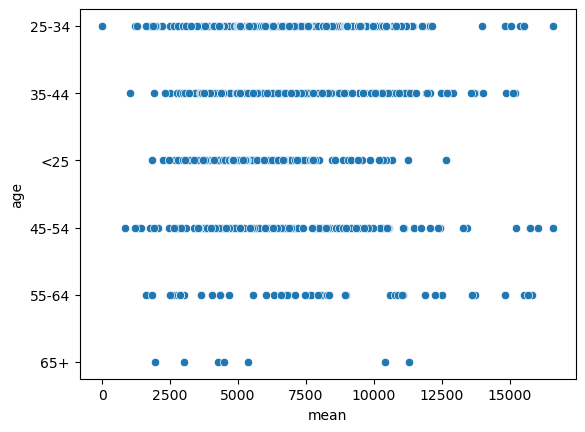

In [70]:
sns.scatterplot(x="mean", y="age", data=df)

<AxesSubplot:xlabel='mean', ylabel='gender'>

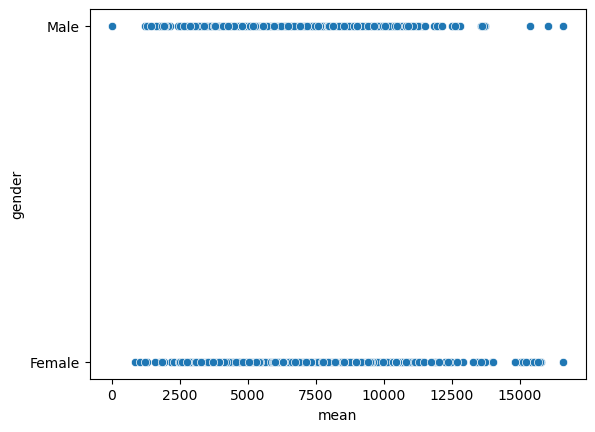

In [71]:
# Scatterplot
sns.scatterplot(x="mean", y="gender", data=df)

In [88]:
df["mean"].describe()

count      918.000000
mean      6657.811636
std       2837.962323
min          4.000000
25%       4633.078051
50%       6236.363048
75%       8322.160985
max      16587.181818
Name: mean, dtype: float64

In [ ]:
It looks like a quit normal distribution, and there is slightly a 'tail' on the right (right-skewed). There are some outliers to the right.

<AxesSubplot:xlabel='age', ylabel='mean'>

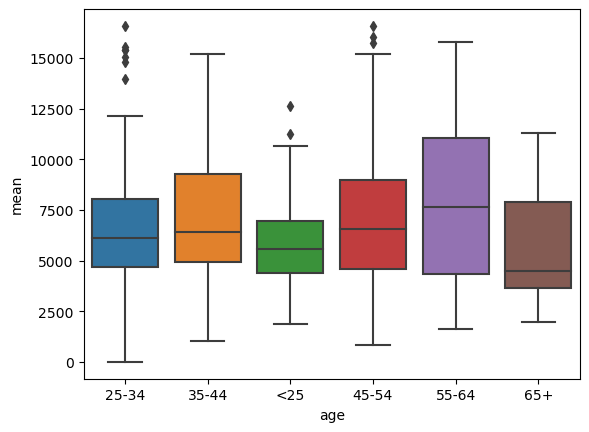

In [86]:
sns.boxplot(data=df, x="age", y="mean")

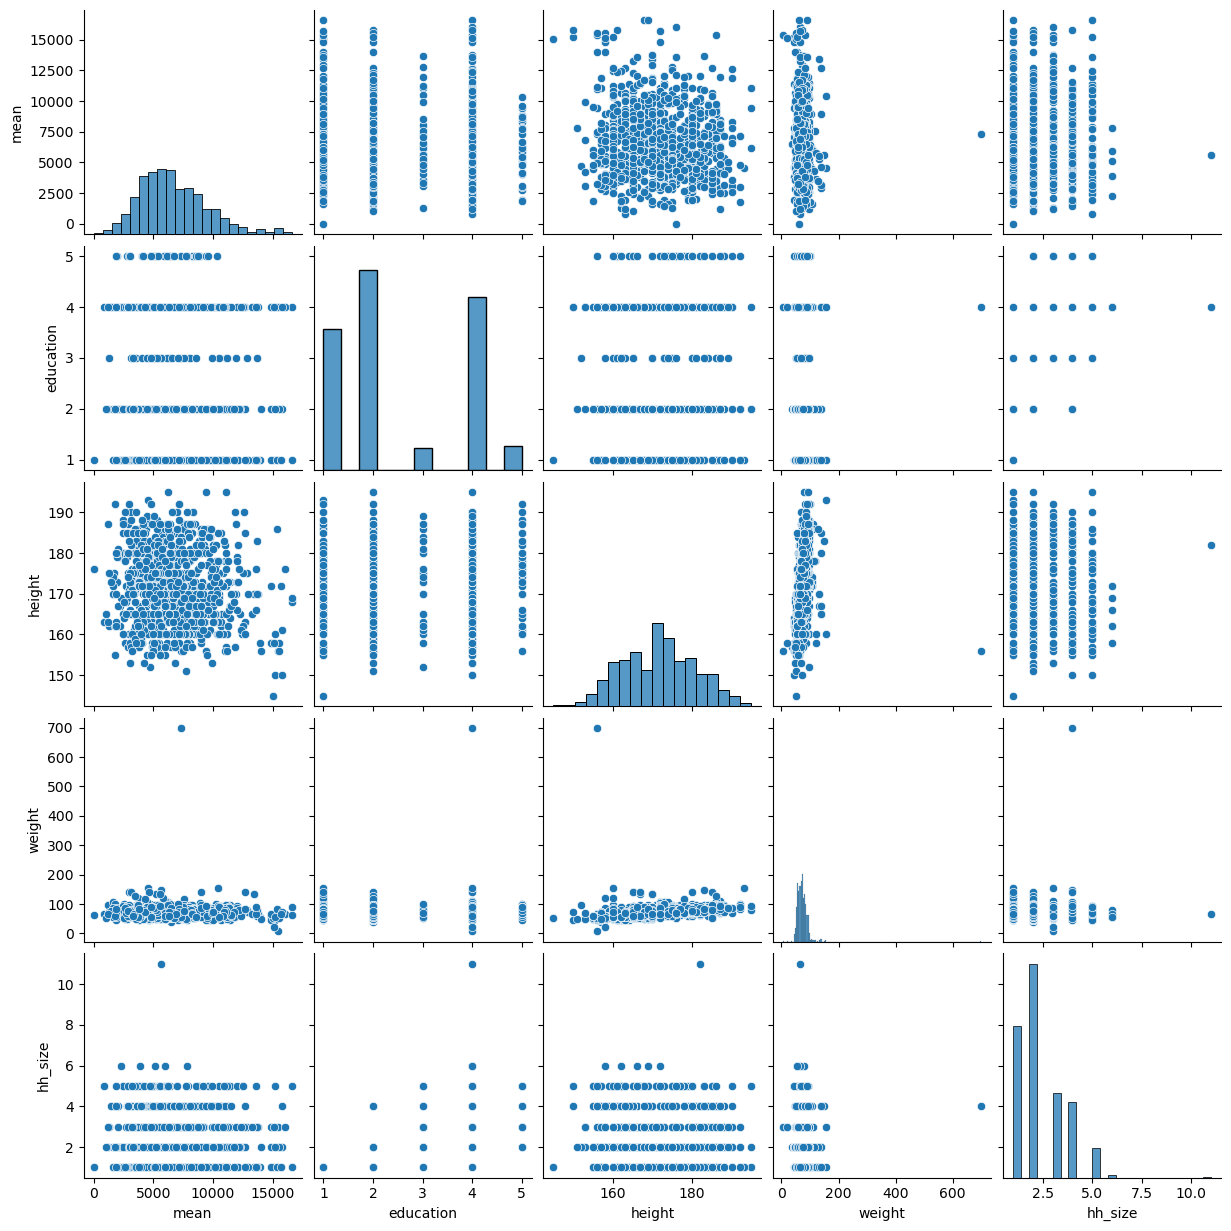

In [73]:
df_places = df[['mean', 'education', 'height', 'weight','hh_size']]
sns.pairplot(df_places)
plt.show()

C:\Users\Mango\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


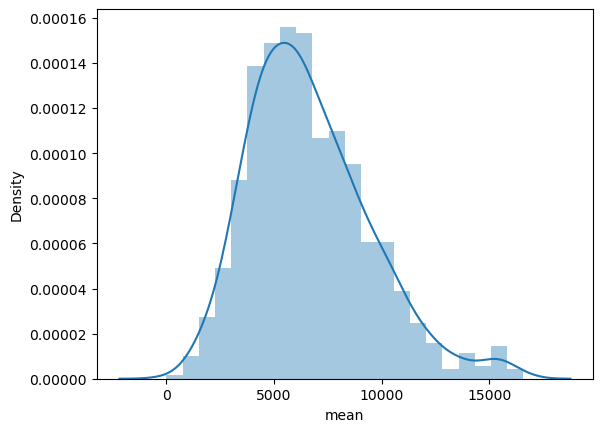

C:\Users\Mango\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


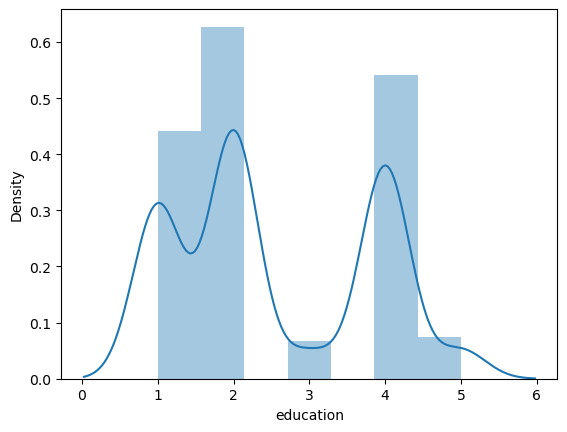

C:\Users\Mango\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


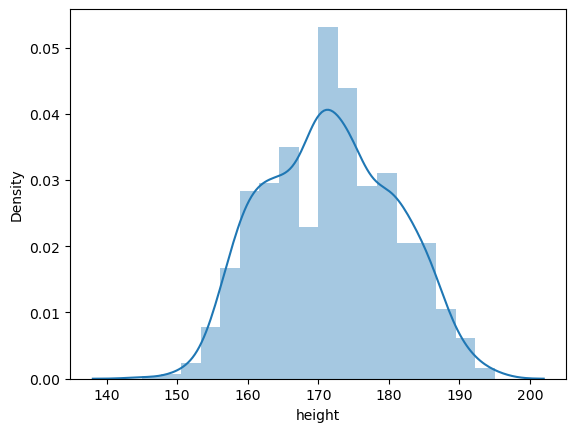

In [74]:
sns.distplot(df['mean'])
plt.show()
sns.distplot(df['education'])
plt.show()
sns.distplot(df['height'])
plt.show()

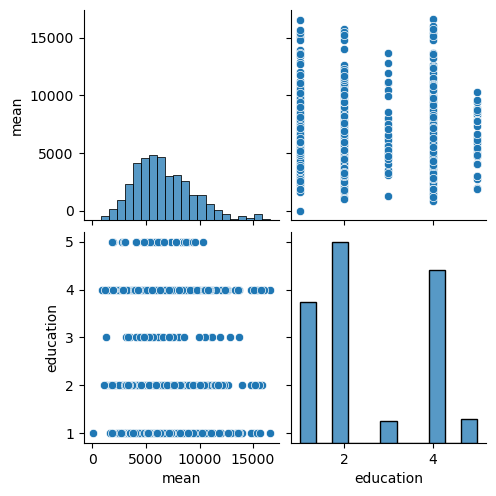

In [75]:
df_places = df[['mean', 'education']]
sns.pairplot(df_places)
plt.show()

In [76]:
# df = df[(df['price'] > 30000) & (df['area'] > 10) & (df['rooms'] > 0)] #we want to subset the original dataset, otherwise we lose data
# df_sel = df[['area', 'rooms', 'price']]

# sns.pairplot(df_sel)
# plt.show()

In [77]:
corr = df[['mean', 'education']].corr() 
corr

,mean,education
mean,1.000000,0.014123
education,0.014123,1.000000


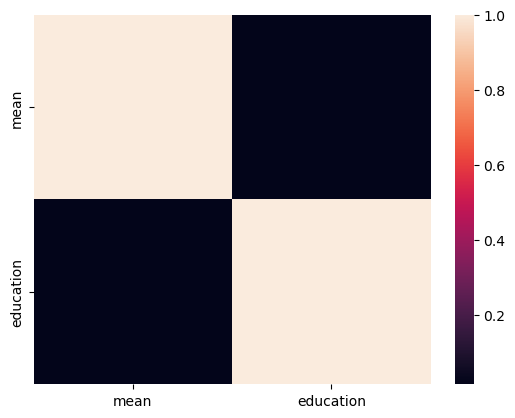

In [78]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()

- Mean and education is no correlation.

# Week 3

A linear relationship (or linear association) is a statistical term used to describe a straight-line relationship between two variables/numbers. (y = Ax + B) | A is the slope, B is the intercept.
A linear relationship (or linear association) is a statistical term used to describe a straight-line relationship between two variables.


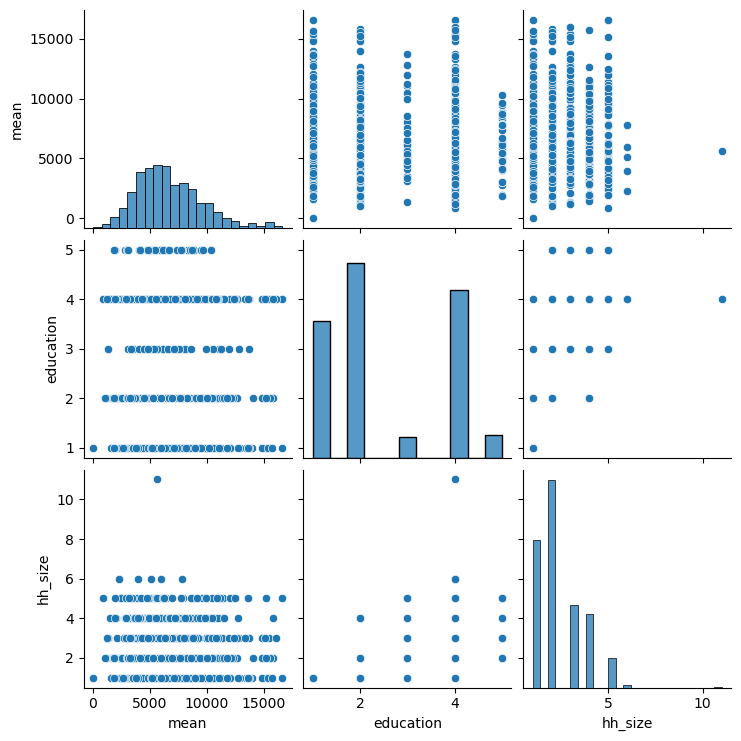

In [79]:
df_places1 = df[['mean', 'education', 'hh_size']]
# mean, stad, gender, age, education
dm_mean= pd.get_dummies(df["mean"])
dm_city =pd.get_dummies(df["city"])
dm_gender =pd.get_dummies(df["gender"])
dm_age =pd.get_dummies(df["age"])
dm_education =pd.get_dummies(df["education"])
sns.pairplot(df_places1)
plt.show()

In [80]:
df = pd.concat([df, dm_education, dm_age, dm_gender, dm_city], axis=1)
df

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,45-54,55-64,65+,<25,Female,Male,Bordeaux,Lille,Lyon,Montpellier
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,0,0,0,0,0,1,1,0,0,0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,0,0,0,0,0,1,0,1,0,0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,0,0,0,0,0,1,0,0,0,1
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,0,0,0,1,0,1,0,0,1,0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,NaN,...,1,0,0,0,1,0,0,1,0,0
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,NaN,...,0,0,0,1,0,1,0,1,0,0
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,NaN,...,0,0,0,0,0,1,0,0,0,1
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,NaN,...,0,1,0,0,1,0,0,1,0,0


In [81]:
df = df[df["mean"].notna()]
df = df[df["city"].notna()]
df = df[df["gender"].notna()]
df = df[df["education"].notna()]
# df = df[df['bmi'].notna()]

X = df[['Bordeaux', 'Lille', 'Lyon', 'Montpellier', 'Female', 'Male']] #to use sk-learn, we need to create lists of the two variables
y = df['mean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

lm = LinearRegression() #this creates a new LR model
lm.fit(X_train, y_train) #this "fits" the model on the training data


LinearRegression()

In [82]:
y_test_p = lm.predict(X_test) #use built-in predict() method to generate predictions; store in original dataframe


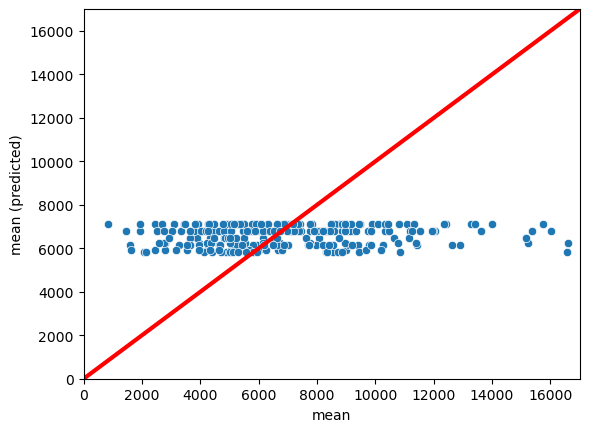

In [83]:
sns.scatterplot(x=y_test,y=y_test_p)
plt.xlim(0, 17000) #This sets the x-axis limits to (0,100000)
plt.ylim(0, 17000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 100000], [0, 100000], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('mean')
plt.ylabel('mean (predicted)')
plt.show()

In [84]:
r2_score(y_test, y_test_p)

-0.003005728527718743

In [85]:
math.sqrt(mean_squared_error(y_test, y_test_p))

2995.804276416648

We notice a R2 score of -0.003005728527718743, which is confusing.
And a mean squard error of: 2995.804276416648